## Step 1: Import Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')


## Step 2: Load Data

In [20]:
data = pd.read_csv("features_30_sec.csv")

In [21]:
# Preview columns
print("Columns in dataset:\n", data.columns, "\n")

Columns in dataset:
 Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_me

## # Step 3. Split features and labels

In [22]:
X = data.drop(["filename", "label"], axis=1)   # 58 features
y = data["label"]

In [23]:
X.shape, y.shape

((1000, 58), (1000,))

In [24]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)          

# Step 4. Feature Scaling ( Standarization)

In [25]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5. Model tarining

In [26]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)


,priors,None
,reg_param,0.0
,store_covariance,False
,tol,0.0001


# Step 6. Model prediction

In [27]:
y_pred = qda.predict(X_test)


## Step 7. Model evaluation

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print("accuracy : ",accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy :  0.53

Classification Report:
              precision    recall  f1-score   support

       blues       0.39      0.95      0.55        20
   classical       0.93      1.00      0.96        13
     country       0.71      0.19      0.29        27
       disco       0.50      0.33      0.40        21
      hiphop       0.24      0.87      0.37        15
        jazz       0.82      0.64      0.72        22
       metal       0.92      0.48      0.63        25
         pop       0.83      0.77      0.80        13
      reggae       0.75      0.39      0.51        23
        rock       0.57      0.19      0.29        21

    accuracy                           0.53       200
   macro avg       0.67      0.58      0.55       200
weighted avg       0.67      0.53      0.53       200



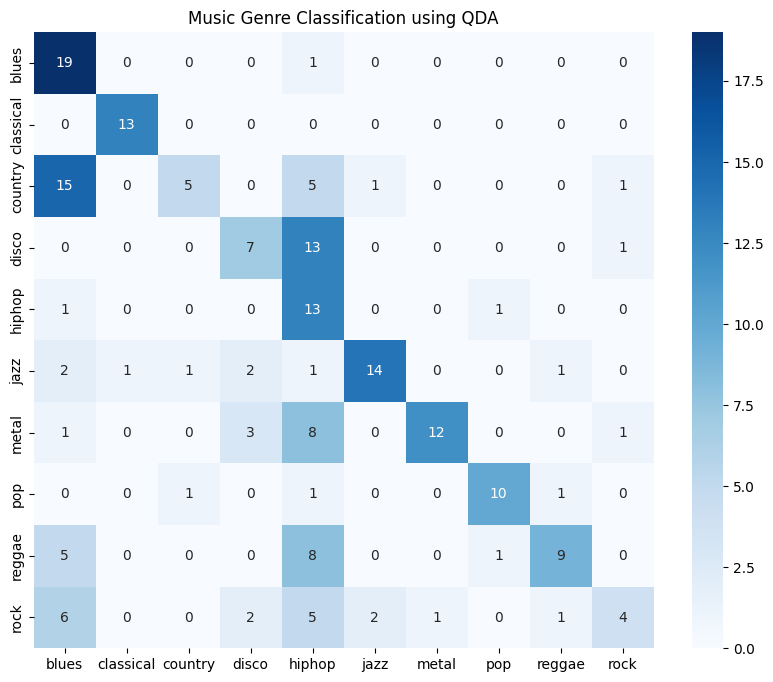

In [29]:
# 9. Confusion Matrix Heatmap
plt.figure(figsize=(10,8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Music Genre Classification using QDA")
plt.show()

Expected Output

Accuracy around 60% – 75% (depends on dataset)

Classification report (precision/recall per genre)

Confusion matrix

In [30]:
#!pip install streamlit librosa scikit-learn numpy pandas joblib


## Train & Save QDA Model

In [31]:
import joblib

joblib.dump(qda, "models/qda_model.pkl")
joblib.dump(scaler,  "models/scaler.pkl")

print("Model & Scaler Saved Successfully!")

Model & Scaler Saved Successfully!
